# Import Libraries

In [386]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Loading the dataset into a dataframe

In [387]:
df = pd.read_csv('/kaggle/input/global-happiness-scores-and-factors/WHR_2023.csv')
df.dropna()
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


# Preaparing the training and test dataset

In [389]:
data = np.asarray(df) #Converting the dataset into a numpy array


y_train = np.asarray(data[0:5,2:3]).reshape(5,) #All row last column 
x_train = np.asarray(data[0:5,3:]) #All row first two columns

y_test = np.asarray(data[6:11,2:3]).reshape(5,) #All row last column 
x_test = np.asarray(data[6:11,3:]) #All row first two columns

m,c = x_train.shape
print('Total row: {0}\nColumn: {1}'.format(m,c))
y_train

Total row: 5
Column: 6


array([7.804, 7.586, 7.53, 7.473, 7.403], dtype=object)

# Linear Regression

In [390]:
class LinearRegression:
    """
    Simple linear regression model that uses gradient descent to fit the model to the data.
    
    Attributes:
    x_train (ndarray): Training features, shape (n_samples, n_features).
    y_train (ndarray): Training labels, shape (n_samples,).
    iteration (int): Number of iterations for the gradient descent.
    alpha (float): Learning rate for gradient descent.
    """
    
    def __init__(self, x_train, y_train, iteration, alpha):
        """
        Initializes the LinearRegression model with training data, number of iterations, and learning rate.
        
        Parameters:
        x_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        iteration (int): Number of iterations for the gradient descent.
        alpha (float): Learning rate.
        """
        self.x_train = x_train
        self.y_train = y_train
        self.iteration = iteration
        self.alpha = alpha
        
    def compute_gradient(self, y_predicted):
        """
        Computes the gradients of the cost function with respect to the model parameters.
        
        Parameters:
        y_predicted (ndarray): Predicted labels based on the current model parameters.
        
        Returns:
        tuple: The gradient with respect to weights (dw) and the gradient with respect to bias (db).
        """
        m = self.x_train.shape[0]
        dw = (1/m) * np.dot((y_predicted - self.y_train),self.x_train)
        db = (1/m) * np.sum(y_predicted - self.y_train)
    
        return dw, db

    def compute_cost(self, y_predicted):
        """
        Computes the cost function for the linear regression model.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        
        Returns:
        float: The cost associated with the current model parameters.
        """
        m = self.y_train.size
        J = np.sum((y_predicted - self.y_train) ** 2) / (2 * m)
        return J

    def gradient_descend(self):
        """
        Performs gradient descent to optimize the model parameters.
        
        Returns:
        ndarray: The optimized weights.
        float: The optimized bias.
        list: History of the cost function values.
        list: History of the weights.
        list: History of the biases.
        """
        m, c = self.x_train.shape
        W = np.zeros(c,dtype=float)
        b = 0

        J_history = []
        W_history = []
        B_history = []

        for i in range(self.iteration):
            W_history.append(W.copy())
            B_history.append(b)
            
            y_predicted = np.dot(self.x_train, W) + b
            J = self.compute_cost(y_predicted)
            dw, db = self.compute_gradient(y_predicted)
           
            # Ensure outputs are numeric
            dw = np.asarray(dw, dtype=np.float64)
            db = np.asarray(db, dtype=np.float64)
            
            assert W.shape == dw.shape, "Shape mismatch between W and dw"

            J_history.append(J)
            W -= self.alpha * dw
            b -= self.alpha * db



        return W, b, J_history, W_history, B_history
    
    def predict(self, x_test):
        """
        Makes predictions using the linear regression model.
        
        Parameters:
        x_test (ndarray): Test features.
        
        Returns:
        ndarray: The optimized weights.
        float: The optimized bias.
        list: History of the cost function values.
        list: History of the weights.
        list: History of the biases.
        ndarray: Predictions for the test data.
        """
        W, b, J_history, W_history, B_history = self.gradient_descend()
        y_predicted = np.dot(x_test, W) + b
        return W, b, J_history, W_history, B_history, y_predicted
    
    def evaluate(self, y_predicted, y_test):
        """
        Evaluates the model using mean squared error.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        y_test (ndarray): Actual labels.
        
        Returns:
        float: Mean squared error of the predictions.
        """
        return np.mean((y_predicted - y_test) ** 2)
    
    def r_squared(self, y_predicted, y_test):
        """
        Calculates the coefficient of determination, R^2, of the prediction.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        y_test (ndarray): Actual labels.
        
        Returns:
        float: The R^2 score.
        """
        ss_res = np.sum((y_test - y_predicted) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def parameters(self,J_history,W_history,B_history):
        """
        Creates a panda dataframe of the parameters.
        
        Parameters:
        list: History of the cost function values.
        list: History of the weights.
        list: History of the biases.
        
        Returns:
        pandas.core.frame.DataFrame: The dataframe.
        """
        data = []
        for i in range(len(J_history)):
            # Initialize iteration data with iteration number, cost, and bias
            iteration_data = {
                'Iteration': i,
                'Cost': J_history[i],
                'Bias': B_history[i],
            }

            # Dynamically add each weight to the iteration data
            for weight_index, weight_value in enumerate(W_history[i]):
                iteration_data[f'Weight_{weight_index}'] = weight_value

            # Append the iteration data to the overall data list
            data.append(iteration_data)
        df_parameters = pd.DataFrame(data)

    
        return df_parameters

# Model building

In [393]:
lr = LinearRegression(x_train,y_train,1000,.01 )
W,B,J_history,W_history,B_history,y_predicted  = lr.predict(x_test)
df_parameters = lr.parameters(J_history,W_history,B_history)
df_parameters.head()

,Iteration,Cost,Bias,Weight_0,Weight_1,Weight_2,Weight_3,Weight_4,Weight_5
0,0,28.580085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,24.187763,0.075592,0.144193,0.117386,0.041609,0.052754,0.014457,0.027327
2,2,20.470785,0.145132,0.276837,0.225374,0.079888,0.101280,0.027750,0.052462
3,3,17.325313,0.209106,0.398857,0.324717,0.115104,0.145917,0.039971,0.075582
4,4,14.663475,0.267958,0.511103,0.416106,0.147501,0.186976,0.051207,0.096846


# Parameters Exploration

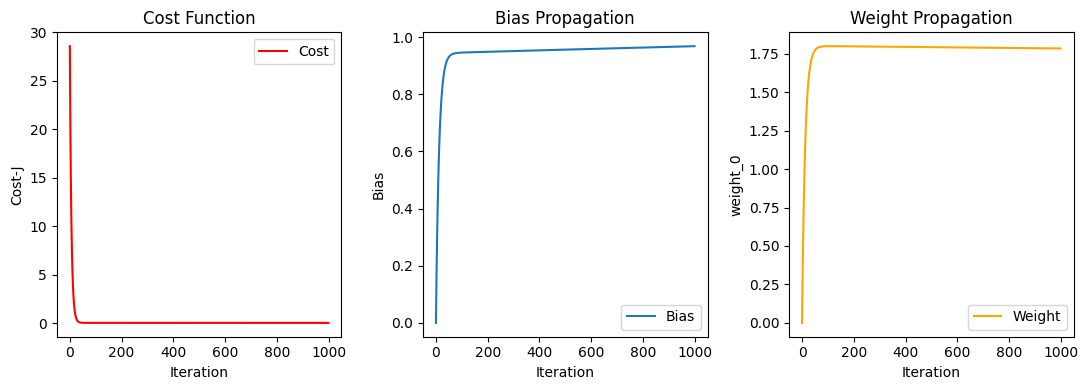

In [394]:
plt.figure(figsize = (11,4))
plt.subplot(1,3,1)
plt.title('Cost Function')
plt.plot(df_parameters.Iteration, df_parameters.Cost, label = 'Cost', color = 'r')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Cost-J')

plt.subplot(1,3,2)
plt.title('Bias Propagation')
plt.plot(df_parameters.Iteration, df_parameters.Bias, label = 'Bias')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.subplot(1,3,3)
plt.title('Weight Propagation')
plt.plot(df_parameters.Iteration, df_parameters.Weight_0, label = 'Weight', color = 'orange')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('weight_0')
plt.tight_layout()
plt.show()